# this project will be analyzing exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
## My questions are:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
pd.options.display.max_columns=999
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# import the data
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [8]:
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


In [9]:
dete_survey_updated = dete_survey.drop( dete_survey.columns[28:49], axis=1)

In [10]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1
                                      )

In [12]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

So far we dropped the columns we wont need for the analysis.

lets update the column names of both datasets so that they match on concatation

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [16]:
column_names={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(column_names, axis=1,inplace=True)

In [17]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
# using regex and a mask select all values in the 'separationtype' column that contain the 'Resignation' word
# because we are interested in analyzing the employees who resigned
temp = r'Resignation'
dete_resignation_mask = dete_survey_updated['separationtype'].str.contains(temp)
dete_resignations = dete_survey_updated[dete_resignation_mask].copy()

In [21]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [22]:
dete_resignations['separationtype'] = 'Resignation'
dete_resignations['separationtype'].value_counts(dropna=False)

Resignation    311
Name: separationtype, dtype: int64

In [23]:
tafe_resignation_mask = tafe_survey_updated['separationtype'].str.contains(temp,na=False)
tafe_resignations = tafe_survey_updated[tafe_resignation_mask].copy()

In [24]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [25]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [26]:
# make sure all reporting is done in years because some month information is missing
#remove rows with missing dates as thats the center of our analysis
dete_resignations['cease_date'] = pd.to_datetime(dete_resignations['cease_date'])
dete_resignations['cease_date'] = dete_resignations['cease_date'].dt.year

In [27]:
missing_date_dete = dete_resignations['cease_date'].notnull()
dete_resignations = dete_resignations[missing_date_dete]
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [28]:
missing_date_dete = dete_resignations['dete_start_date'].notnull()
dete_resignations = dete_resignations[missing_date_dete]
dete_resignations['dete_start_date'].value_counts(dropna=False)

2011.0    23
2008.0    22
2007.0    20
2012.0    20
2010.0    17
2005.0    14
2004.0    14
2009.0    13
2006.0    12
2013.0    10
2000.0     8
1999.0     8
1996.0     6
2002.0     6
1998.0     6
2003.0     6
1992.0     6
1994.0     6
1997.0     5
1993.0     5
1980.0     5
1991.0     4
1989.0     4
1990.0     4
1988.0     4
2001.0     3
1986.0     3
1985.0     3
1995.0     3
1976.0     2
1974.0     2
1983.0     2
1971.0     1
1972.0     1
1982.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

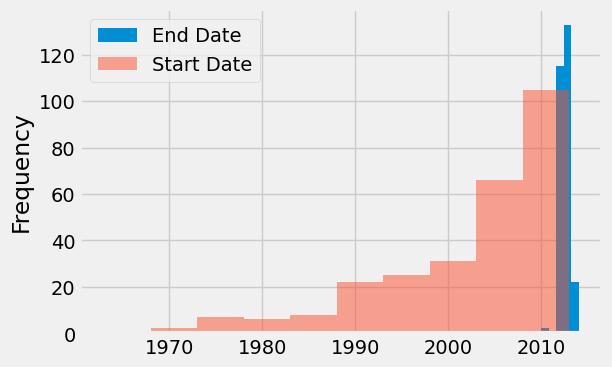

In [29]:
dete_resignations['cease_date'].plot.hist(label = 'End Date')
dete_resignations['dete_start_date'].plot.hist(alpha=0.5, label = 'Start Date')
plt.legend()

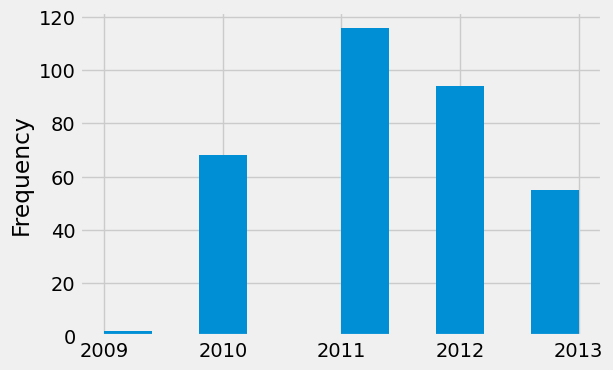

In [30]:
# check the tafe date value counts
tafe_nan_mask = tafe_resignations['cease_date'].notnull()
tafe_resignations = tafe_resignations[tafe_nan_mask]
tafe_resignations['cease_date'].plot.hist()

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

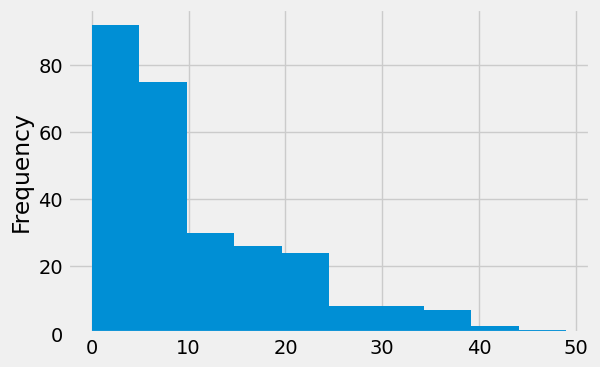

In [31]:
# calculate the service time for the resigned employees from dete
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].plot.hist()

In [32]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         275
Contributing Factors. Dissatisfaction      53
NaN                                         7
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      266
Job Dissatisfaction     62
NaN                      7
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
def mark_dissatisfaction(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(mark_dissatisfaction).any(1,skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    239
True      89
NaN        7
Name: dissatisfied, dtype: int64

In [35]:
dete_resignations['dissatisfied'] = (dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
                     'lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]).any(1,skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

True     137
False    136
Name: dissatisfied, dtype: int64

In [36]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

## At this point  we have macthing columns to concat the two dfs on and we have a column to indicate if employee resigned because they were dissatisfied.

In [37]:
# lest add a column to be able to identify which dataset an entry comes from after concating
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [38]:
combined = pd.concat((tafe_resignations_up,dete_resignations_up),axis=0)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 3 to 819
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   608 non-null    float64
 1   Institute                                            335 non-null    object 
 2   WorkArea                                             335 non-null    object 
 3   cease_date                                           608 non-null    float64
 4   separationtype                                       608 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    328 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   328 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  328 non-null    object 
 8   Contributing Factors. Ill Health                     328 non-null    o

In [39]:
combined.notnull().sum()

id                                                     608
Institute                                              335
WorkArea                                               335
cease_date                                             608
separationtype                                         608
Contributing Factors. Career Move - Public Sector      328
Contributing Factors. Career Move - Private Sector     328
Contributing Factors. Career Move - Self-employment    328
Contributing Factors. Ill Health                       328
Contributing Factors. Maternity/Family                 328
Contributing Factors. Dissatisfaction                  328
Contributing Factors. Job Dissatisfaction              328
Contributing Factors. Interpersonal Conflict           328
Contributing Factors. Study                            328
Contributing Factors. Travel                           328
Contributing Factors. Other                            328
Contributing Factors. NONE                             3

In [40]:
combined.dropna(1, thresh =500, inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 3 to 819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 608 non-null    float64
 1   cease_date         608 non-null    float64
 2   separationtype     608 non-null    object 
 3   gender             556 non-null    object 
 4   age                559 non-null    object 
 5   employment_status  561 non-null    object 
 6   position           558 non-null    object 
 7   institute_service  561 non-null    object 
 8   dissatisfied       601 non-null    object 
 9   institute          608 non-null    object 
dtypes: float64(2), object(8)
memory usage: 52.2+ KB


So far we have dropped all columns with non-null values below 500 after concacting the two dataframes

In [41]:
combined['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   47
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
14.0                   6
17.0                   6
22.0                   6
12.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
21.0                   3
39.0                   3
19.0                   3
30.0                   2
28.0                   2
36.0                   2
26.0                   2
25.0                   2


In [42]:
regex = r'(\d+)'
combined['institute_service'] = combined['institute_service'].astype(str).str.extract(regex)[0].astype(float)
combined['institute_service'].value_counts(dropna=False)

1.0     159
3.0      83
5.0      56
NaN      47
7.0      34
11.0     28
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
13.0      8
8.0       8
15.0      7
10.0      6
14.0      6
17.0      6
22.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
34.0      1
33.0      1
49.0      1
41.0      1
27.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service, dtype: int64

In [43]:
def map_years_to_cat(x):
    if x>=11:
        return 'Veteran'
    elif x>=7 and x<=10:
        return 'Established'
    elif x>=3 and x<=6:
        return 'Experienced'
    elif x<3:
        return 'New'
    else:
        return np.nan
combined['service_category'] = combined['institute_service'].apply(map_years_to_cat)
combined['service_category'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        134
Established     62
NaN             47
Name: service_category, dtype: int64

To analyze the data, I convert the years of service numbers into categories. 
According to the definitions below:

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

In [44]:
combined = combined[combined['dissatisfied'].notnull()].copy()
combined = combined[combined['service_category'].notnull()].copy()
combined.isnull().sum()

id                   0
cease_date           0
separationtype       0
gender               5
age                  2
employment_status    0
position             3
institute_service    0
dissatisfied         0
institute            0
service_category     0
dtype: int64

In [45]:
def map_dissatisfied(x):
    if x==True:
        return 1
    else:
        return 0
combined['dissatisfied'] = combined['dissatisfied'].map(map_dissatisfied)

In [50]:
agg_by_cat = combined.pivot_table(index='service_category', values='dissatisfied')*100

Text(0, 0.5, 'Percentage of disatisfied employees\n among resigned group')

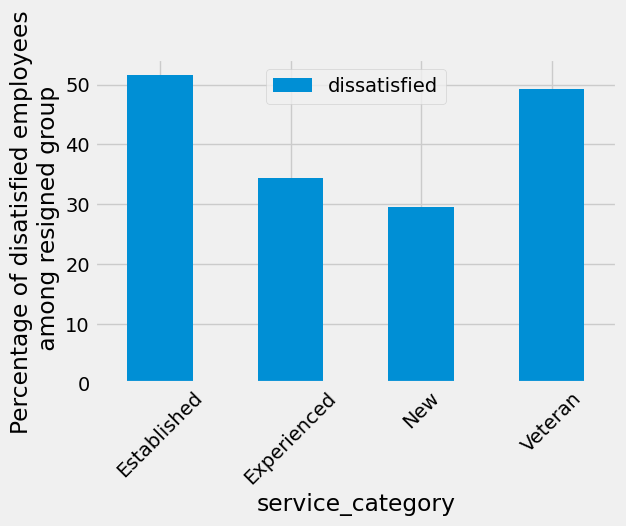

In [56]:
agg_by_cat.plot.bar(rot=45)
plt.ylabel('Percentage of disatisfied employees\n among resigned group')


## From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

Text(0, 0.5, 'Percentage of disatisfied employees by year')

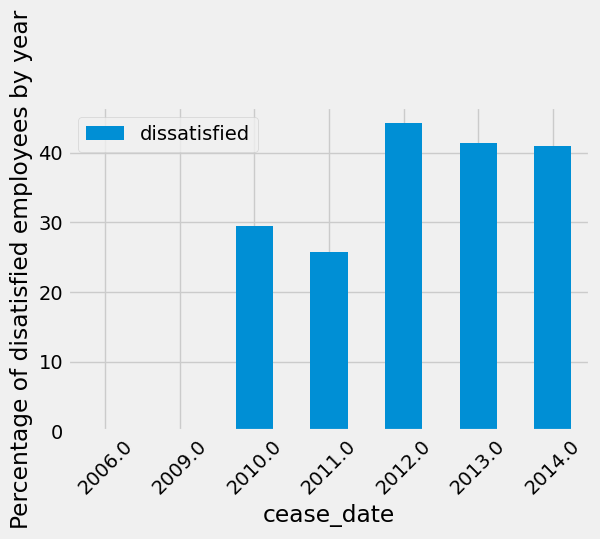

In [57]:
agg_by_date = combined.pivot_table(index='cease_date', values='dissatisfied')*100
agg_by_date.plot.bar(rot=45)
plt.ylabel('Percentage of disatisfied employees by year')

 The years 2012 - 2014 seem to have an increased number if disatisfied employees.
 
 Lets look at the category and date together

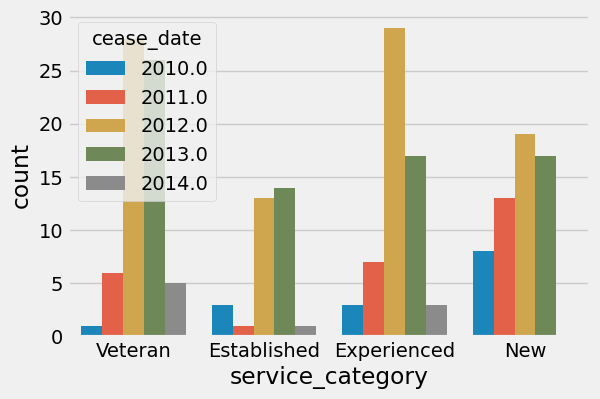

In [65]:
combined_dissatisfied = combined[combined['dissatisfied']==1].copy()
sns.countplot(x='service_category', hue='cease_date',order=['Veteran','Established','Experienced','New'], data=combined_dissatisfied)

Based on the Analysis above we can see that among those who resigned because they were dissatisfied with their position. the year 2012 and 2013 holds the highest number of resignations among veterans, experienced and new employees.

This analysis could be vital to stakeholders to determine what was different about those 2 years.
However we do see a correction in 2014 as the number of employees of all types who resign due to dissatisfaction decreases immensly.